# Applying Python to Experiments

In the first notebook, you saw how you could use Python to perform quick manipulations to data. After this short tutorial, you will be able to apply that knowledge to real experiments. More specifically, you will be able to do the following things in Python:

* Import data from an experiment into Python
* Plot data with error bars
* Manipulate data
* Propagate errors
* Save analyzed data back to disk

# Importing functionality with modules
We import the same modules as in the previous notebook.

In [1]:
import numpy as np  # Numpy stands for "Numerical Python". It contains all the nice codes for manipulating data.
                    # Numpy is the fundamental package for scientific computing with Python: http://numpy.org/
                    # Numpy provides support to mathematically manipulate large, multi-dimensional arrays and matrices.
                    # By importing numpy "as np", we make sure that all numpy-related functions have np. in front of 
                    # them like this: np.function()
import matplotlib.pyplot as plt # Matplotlib.pyplot gives you code to make pretty graphs!
                                # Throughout your studies you will most likely use matplotlib.pyplot 
                                # to plot any graph you need to illustrate your research
                                # By importing pyplot "as plt", we make sure that all pyplot-related functions have 
                                # plt. in front of them like this: plt.function()

# Importing Experimental Data
Data is often saved in a text file on a computer. Usually, the measured values are seperated by comma into columns. We call this *comma seperated values*: csv.

In the next cell, we import data from an experiment where we measured the decay of some substance. The data file has four columns. The first column of the data contains time, the second voltage, the third measurement error in time, the last measurement error in voltage. 

We first assign the name of our data file to a variable called filename. If you use this notebook in your own experiment, edit the filename to match your data. Make sure the filename is the complete filename of the file you want to import.

The function np.loadtxt loads a data file. It takes two arguments. The first is the filename and the second is the delimiter (the character separating the entries in your data file).

Python will look for this file in the folder where the notebook is being executed. You can also specify an absolute path.

Run the next cell.

In [3]:
filename =  "201809Voorbeeldvervaltijdreelefout.csv"
mydata = np.loadtxt(filename, delimiter=",")
print(mydata)

[[0.000e+00 1.057e+02 3.000e-02 4.171e+00]
 [2.000e-01 9.060e+01 3.000e-02 3.718e+00]
 [4.000e-01 7.770e+01 3.000e-02 3.331e+00]
 [6.000e-01 6.660e+01 3.000e-02 2.998e+00]
 [8.000e-01 5.710e+01 3.000e-02 2.713e+00]
 [1.000e+00 4.900e+01 3.000e-02 2.470e+00]
 [1.200e+00 4.200e+01 3.000e-02 2.260e+00]
 [1.400e+00 3.600e+01 3.000e-02 2.080e+00]]


As you can see, the data indeed consists of four columns. It would be very nice if we could manipulate these columns seperately! Luckily, we can do so by specifying four arrays the function np.loadtxt can output to:

In [4]:
time, voltage, time_err, voltage_err = np.loadtxt(filename, delimiter=",", unpack=True)

### Test your understanding:
Print the newly made arrays to check that we really succeeded in splitting the data into four arrays.

# Plot data with error bars
We could plot the data using plt.plot. However, we also want to indicate our measurement error using error bars. We use plt.errorbar instead. This function is similar to plt.plot, but allows for simple plotting of errorbars.

The argument fmt="o" makes sure that every data point is plotted seperately. **Never use line plots for experimental data, always use scatter plots!** See the documentation for errorbar (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html), for the allowed inputs. When plotting measurement data, we typically do not plot a line connecting the datapoints. This is because such a line suggests that we have information about the points between our measurements. 

What we typically do show is a curve representing the theoretical expectations or fitted data. In the next notebook (2. fitting) we will discuss how to plot such a fitted curve.

'The argument fmt="o" is added so we do not get an unmeasured (and thus undesired) linegraph through our measuring points!'

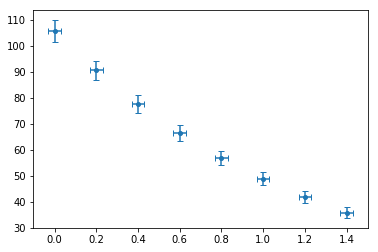

In [9]:
plt.figure()
plt.errorbar(time,voltage,xerr=time_err,yerr=voltage_err,fmt="o", markersize=4, capsize=3)
"""The argument fmt="o" is added so we do not get an unmeasured (and thus undesired) linegraph through our measuring points!""" 

# Manipulating data and errors
We can apply all kinds of mathematical operations to the data. For instance if we are measuring the voltage over some special component for which the resistance is given by $R = 5V^2$, we can define a new variable $R$ and its error using $\sigma_y=|\frac{dy}{dx}|\sigma_x$:

Text(0,0.5,'y (unit of y)')

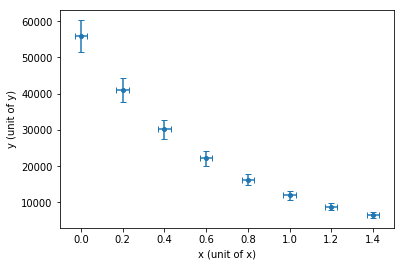

In [10]:
# Calculating R is quite easy
R = 5*voltage**2
# Calculating the propagated error in R is more difficult. We now need the error propagation formula:
# error y = dy/dx * error x
R_err = 10*voltage*voltage_err
# And now we can plot an R vs time graph with correct errorbars.
plt.errorbar(time,R,xerr=time_err,yerr=R_err,fmt="o",capsize=3,markersize=4)
plt.xlabel("x (unit of x)")
plt.ylabel("y (unit of y)")

### Test your understanding:
Suppose we made a tiny mistake; we forgot a linear term. The actual relation between $R$ and $V$ is $R = 5V^2 -0.2V$. Rewrite the code to reflect this change. How do the errors change? 


# Save data
To save the Resistance data that we have calculated together with the original time and Voltage data, we can use np.savetxt. So that other people can also use our data, we explain our data with a header:

In [12]:
header="time(s), V (V), R (Ohm), time error (s), V error (Volt), R error (Ohm)"
np.savetxt("myoutputfile.csv",np.c_[time, voltage, R, time_err, voltage_err, R_err],delimiter=",", header=header)

Some notes:
* np.savetxt overwrites any existing files without asking
* When performing data analysis, never alter the original measurement data. Therefore store the results of your analysis in a different file than that of your original data.
* Keep track of which scripts, figures and datafiles belong to which experiment in your labjournal. You should be able to find back the digital files which belong to a certain lab journal entry and the other way around. 
* Consider using date, time and usernames in your filenames.

## Enjoy analyzing data!

In [13]:
# If you want to analyze your own data during your experiments, and use this notebook, continue here.